In [0]:
import pandas as pd
import zipfile
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from google.colab import drive  #importing file from local drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
name_basics = pd.read_csv(r'/content/drive/My Drive//name.basics.tsv.gz', sep = '\t')
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0043044,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0038355,tt0071877,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0059956,tt0049189,tt0054452,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0078723,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0050976,tt0083922"


In [4]:
name = name_basics[['nconst','primaryProfession','birthYear']] # keeping the required ones
name

,nconst,primaryProfession,birthYear
0,nm0000001,"soundtrack,actor,miscellaneous",1899
1,nm0000002,"actress,soundtrack",1924
2,nm0000003,"actress,soundtrack,producer",1934
3,nm0000004,"actor,soundtrack,writer",1949
4,nm0000005,"writer,director,actor",1918
...,...,...,...
10085351,nm9993714,"animation_department,art_department",\N
10085352,nm9993716,NaN,\N
10085353,nm9993717,cinematographer,\N
10085354,nm9993718,cinematographer,\N


In [0]:
del name_basics # deleting to free memory

In [6]:
name=name.replace(name.loc[10085355][2],np.nan) # replacing all \N with NaN
name = name.dropna() # then dropping Nan
name

,nconst,primaryProfession,birthYear
0,nm0000001,"soundtrack,actor,miscellaneous",1899
1,nm0000002,"actress,soundtrack",1924
2,nm0000003,"actress,soundtrack,producer",1934
3,nm0000004,"actor,soundtrack,writer",1949
4,nm0000005,"writer,director,actor",1918
...,...,...,...
10084634,nm9992946,"assistant_director,camera_department,director",1993
10084658,nm9992971,"editor,sound_department,writer",1988
10085036,nm9993379,"director,actress,writer",1988
10085086,nm9993435,set_decorator,1919


In [7]:
prof = pd.DataFrame(name.primaryProfession.str.split(',').tolist(), index=name.nconst).stack() # spiltting to get just actors
prof = prof.reset_index()[['nconst',0]]
prof.columns = [ 'nconst', 'profession']
prof

,nconst,profession
0,nm0000001,soundtrack
1,nm0000001,actor
2,nm0000001,miscellaneous
3,nm0000002,actress
4,nm0000002,soundtrack
...,...,...
796146,nm9993379,director
796147,nm9993379,actress
796148,nm9993379,writer
796149,nm9993435,set_decorator


In [8]:
prof = prof[prof.profession == 'actor'] # keeping only actors
prof

,nconst,profession
1,nm0000001,actor
8,nm0000004,actor
13,nm0000005,actor
17,nm0000007,actor
20,nm0000008,actor
...,...,...
796122,nm9989841,actor
796123,nm9989842,actor
796131,nm9990278,actor
796135,nm9992344,actor


In [9]:
name = name.drop('primaryProfession', axis = 1) # now profession is not required as just actors are kept
name

,nconst,birthYear
0,nm0000001,1899
1,nm0000002,1924
2,nm0000003,1934
3,nm0000004,1949
4,nm0000005,1918
...,...,...
10084634,nm9992946,1993
10084658,nm9992971,1988
10085036,nm9993379,1988
10085086,nm9993435,1919


In [10]:
prof = prof.merge(name, how = 'inner',left_on = 'nconst', right_on = 'nconst') # merging name and prof to get actors associated with their birth age
prof

,nconst,profession,birthYear
0,nm0000001,actor,1899
1,nm0000004,actor,1949
2,nm0000005,actor,1918
3,nm0000007,actor,1899
4,nm0000008,actor,1924
...,...,...,...
185967,nm9989841,actor,1990
185968,nm9989842,actor,1987
185969,nm9990278,actor,2002
185970,nm9992344,actor,1987


In [11]:
principals_title = pd.read_csv(r'https://datasets.imdbws.com/title.principals.tsv.gz', sep = '\t') #to get a relation of nconst and tconst
principals_title.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [12]:
principals_title = principals_title[['tconst','nconst']] # keeping the constats
principals_title

,tconst,nconst
0,tt0000001,nm1588970
1,tt0000001,nm0005690
2,tt0000001,nm0374658
3,tt0000002,nm0721526
4,tt0000002,nm1335271
...,...,...
39296799,tt9916880,nm0996406
39296800,tt9916880,nm1482639
39296801,tt9916880,nm2586970
39296802,tt9916880,nm1594058


In [13]:
new = prof.merge(principals_title, how = 'inner',left_on = 'nconst', right_on = 'nconst') # merging to get tconst
new

,nconst,profession,birthYear,tconst
0,nm0000001,actor,1899,tt0025164
1,nm0000001,actor,1899,tt0026942
2,nm0000001,actor,1899,tt0027125
3,nm0000001,actor,1899,tt0027630
4,nm0000001,actor,1899,tt0028333
...,...,...,...,...
7926367,nm9992344,actor,1987,tt8383718
7926368,nm9992344,actor,1987,tt9225050
7926369,nm9992344,actor,1987,tt9489162
7926370,nm9992344,actor,1987,tt9527406


In [14]:
basics = pd.read_csv(r'/content/drive/My Drive//title.basics.tsv.gz', sep = '\t') #reading the file to get start year
basics.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [15]:
basics = basics[['tconst','startYear']] # keeping primary index and start year 
basics

,tconst,startYear
0,tt0000001,1894
1,tt0000002,1892
2,tt0000003,1892
3,tt0000004,1892
4,tt0000005,1893
...,...,...
6796788,tt9916848,2010
6796789,tt9916850,2010
6796790,tt9916852,2010
6796791,tt9916856,2015


In [0]:
new = new.merge(basics,how = 'inner',left_on = 'tconst', right_on = 'tconst') # merging to get start year

In [17]:
new

,nconst,profession,birthYear,tconst,startYear
0,nm0000001,actor,1899,tt0025164,1934
1,nm0002143,actor,1886,tt0025164,1934
2,nm0000001,actor,1899,tt0026942,1935
3,nm0000068,actor,1898,tt0026942,1935
4,nm0000001,actor,1899,tt0027125,1935
...,...,...,...,...,...
7916152,nm9992344,actor,1987,tt11540818,2019
7916153,nm9992344,actor,1987,tt11596370,2019
7916154,nm9992344,actor,1987,tt8383718,2018
7916155,nm9992344,actor,1987,tt9225050,2018


In [18]:
new=new.replace('\\N',np.nan) 
new = new.dropna()
new

,nconst,profession,birthYear,tconst,startYear
0,nm0000001,actor,1899,tt0025164,1934
1,nm0002143,actor,1886,tt0025164,1934
2,nm0000001,actor,1899,tt0026942,1935
3,nm0000068,actor,1898,tt0026942,1935
4,nm0000001,actor,1899,tt0027125,1935
...,...,...,...,...,...
7916152,nm9992344,actor,1987,tt11540818,2019
7916153,nm9992344,actor,1987,tt11596370,2019
7916154,nm9992344,actor,1987,tt8383718,2018
7916155,nm9992344,actor,1987,tt9225050,2018


In [19]:
new=new.astype({'startYear'  : 'int32' ,  'birthYear' : 'int32'}) # converting datatypes of years to substract
new.dtypes

nconst        object
profession    object
birthYear      int32
tconst        object
startYear      int32
dtype: object

In [0]:
new.drop(new[new.birthYear>=new.startYear].index,axis=0,inplace=True) # dropping negative ages

In [21]:
new['Age'] = new.startYear - new.birthYear # finding age
new

,nconst,profession,birthYear,tconst,startYear,Age
0,nm0000001,actor,1899,tt0025164,1934,35
1,nm0002143,actor,1886,tt0025164,1934,48
2,nm0000001,actor,1899,tt0026942,1935,36
3,nm0000068,actor,1898,tt0026942,1935,37
4,nm0000001,actor,1899,tt0027125,1935,36
...,...,...,...,...,...,...
7916152,nm9992344,actor,1987,tt11540818,2019,32
7916153,nm9992344,actor,1987,tt11596370,2019,32
7916154,nm9992344,actor,1987,tt8383718,2018,31
7916155,nm9992344,actor,1987,tt9225050,2018,31


In [22]:
ratings_title = pd.read_csv(r'https://datasets.imdbws.com/title.ratings.tsv.gz', sep = '\t') #reading the ratings file to get average rating
ratings_title

,tconst,averageRating,numVotes
0,tt0000001,5.6,1613
1,tt0000002,6.0,197
2,tt0000003,6.5,1292
3,tt0000004,6.1,121
4,tt0000005,6.1,2067
...,...,...,...
1041193,tt9916576,6.0,9
1041194,tt9916578,8.5,18
1041195,tt9916720,5.7,51
1041196,tt9916766,6.8,13


In [26]:
#keeping only those having number of votes greater than 50
ratings_title = ratings_title[ratings_title.numVotes>=50]
ratings_title

,tconst,averageRating,numVotes
0,tt0000001,5.6,1613
1,tt0000002,6.0,197
2,tt0000003,6.5,1292
3,tt0000004,6.1,121
4,tt0000005,6.1,2067
...,...,...,...
1041173,tt9915912,7.3,71
1041182,tt9916200,8.4,153
1041183,tt9916204,8.2,177
1041188,tt9916380,9.1,101


In [27]:
ratings_title = ratings_title[['tconst','averageRating']]
ratings_title

,tconst,averageRating
0,tt0000001,5.6
1,tt0000002,6.0
2,tt0000003,6.5
3,tt0000004,6.1
4,tt0000005,6.1
...,...,...
1041173,tt9915912,7.3
1041182,tt9916200,8.4
1041183,tt9916204,8.2
1041188,tt9916380,9.1


In [28]:
fina = new.merge(ratings_title, how = 'inner',left_on = 'tconst', right_on = 'tconst') # merging average rating to ages dataframe
fina

,nconst,profession,birthYear,tconst,startYear,Age,averageRating
0,nm0000001,actor,1899,tt0025164,1934,35,7.5
1,nm0002143,actor,1886,tt0025164,1934,48,7.5
2,nm0000001,actor,1899,tt0026942,1935,36,7.1
3,nm0000068,actor,1898,tt0026942,1935,37,7.1
4,nm0000001,actor,1899,tt0027125,1935,36,7.8
...,...,...,...,...,...,...,...
803699,nm9893604,actor,1982,tt10370956,2019,37,5.9
803700,nm9893604,actor,1982,tt10483928,2019,37,6.7
803701,nm9893604,actor,1982,tt7424250,2016,34,7.8
803702,nm9900228,actor,1994,tt7392222,2017,23,4.1


In [29]:
age_rating = fina[['Age','averageRating']] # keeping age and rating
age_rating

,Age,averageRating
0,35,7.5
1,48,7.5
2,36,7.1
3,37,7.1
4,36,7.8
...,...,...
803699,37,5.9
803700,37,6.7
803701,34,7.8
803702,23,4.1


In [30]:
age_rating.sort_values(by='Age', inplace=True, ignore_index=True) # sorting according to age
age_rating

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,averageRating
0,1,6.8
1,1,5.5
2,1,7.4
3,1,6.5
4,1,6.6
...,...,...
803699,180,6.0
803700,184,6.5
803701,213,8.0
803702,241,7.2


In [31]:
age_rating=age_rating[age_rating.Age<=80] # not keeping kids and too older people or unrealistic age
age_rating=age_rating[age_rating.Age>=10]
age_rating.reset_index(inplace=True)
age_rating

,index,Age,averageRating
0,2385,10,7.8
1,2386,10,7.5
2,2387,10,7.2
3,2388,10,3.3
4,2389,10,7.3
...,...,...,...
795072,797457,80,8.1
795073,797458,80,7.9
795074,797459,80,2.6
795075,797460,80,6.9


In [32]:
age_rating = age_rating.drop('index',axis = 1)
age_rating

,Age,averageRating
0,10,7.8
1,10,7.5
2,10,7.2
3,10,3.3
4,10,7.3
...,...,...
795072,80,8.1
795073,80,7.9
795074,80,2.6
795075,80,6.9


In [33]:
categories=pd.cut(age_rating.Age,bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80],include_lowest=True,
            labels=['10-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','60-65','66-70','71-75','76-80'])
categories

0         10-15
1         10-15
2         10-15
3         10-15
4         10-15
          ...  
795072    76-80
795073    76-80
795074    76-80
795075    76-80
795076    76-80
Name: Age, Length: 795077, dtype: category
Categories (14, object): [10-15 < 16-20 < 21-25 < 26-30 ... 60-65 < 66-70 < 71-75 < 76-80]

In [34]:
mean_rating=age_rating.groupby(categories).mean()
mean_rating=mean_rating.drop('Age',axis=1)
mean_rating=mean_rating.reset_index()
mean_rating

,Age,averageRating
0,10-15,6.949919
1,16-20,7.015418
2,21-25,6.863878
3,26-30,6.863876
4,31-35,6.952035
5,36-40,6.987949
6,41-45,6.941887
7,46-50,6.924333
8,51-55,6.921427
9,56-60,6.881423


In [35]:
mean_rating=mean_rating.astype({'Age':'string'})
mean_rating.dtypes

Age               string
averageRating    float64
dtype: object

<BarContainer object of 14 artists>

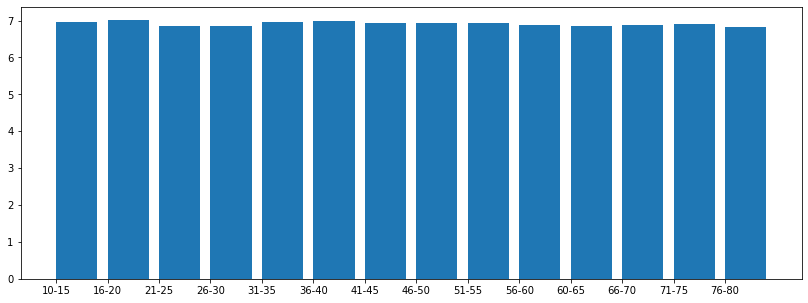

In [36]:
plt.figure(figsize=(14,5))
plt.bar(mean_rating.Age,mean_rating.averageRating,width = .8,align = 'edge')